In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/leighajarett/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [77]:
import operator
import csv
import pandas as pd
import sklearn
from sklearn.cross_validation import KFold
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import confusion_matrix
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

In [2]:
###Part 1: KNN

#Download the training and test data 
digits = np.genfromtxt('/Users/leighajarett/Desktop/train.csv', dtype=None, delimiter=',', skip_header=1) 
digits.shape

(42000, 785)

In [3]:
#Separate into X - feature data, and Y - labels
Y = digits[:,0] #labels
X = digits[:,1:785] #features
X.shape

(42000, 784)

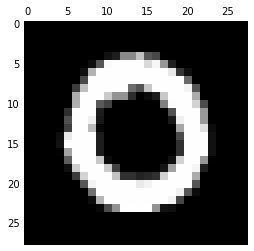

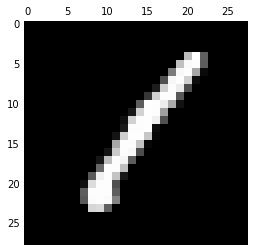

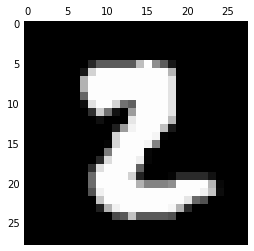

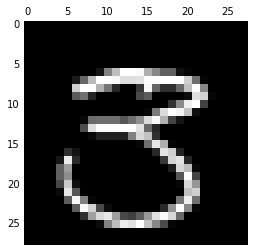

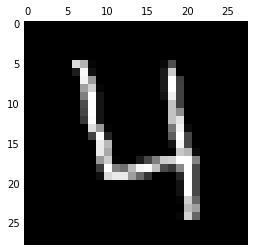

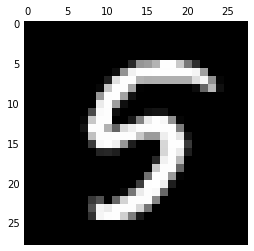

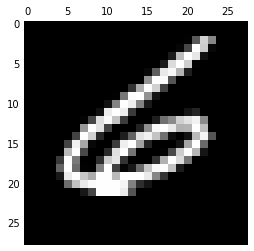

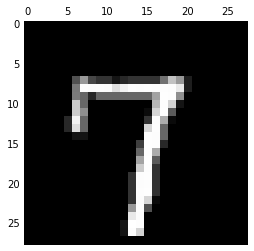

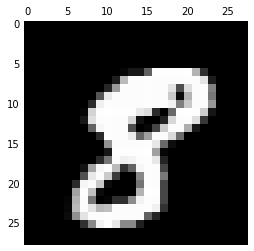

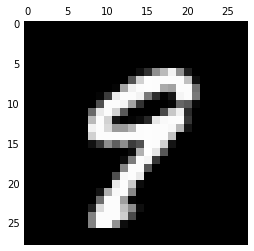

In [12]:
#Write a function to display digits, display first of each digit
for i in range(0,10):
    a = np.where(Y == (i))[0][0]  #get the first occurrence of each digits
    matshow(X[a].reshape(28,28), cmap='gray')  

In [13]:
#Examine prior probability
c = []
for i in range(0,10):
    b = len(np.where(Y == (i))[0])/42000  #for each digit, find all occurrences and divide by total
    c.append(b)
    print("Prior probability of", i, "is", b)

Prior probability of 0 is 0.09838095238095237
Prior probability of 1 is 0.11152380952380953
Prior probability of 2 is 0.09945238095238096
Prior probability of 3 is 0.1035952380952381
Prior probability of 4 is 0.09695238095238096
Prior probability of 5 is 0.09035714285714286
Prior probability of 6 is 0.0985
Prior probability of 7 is 0.10478571428571429
Prior probability of 8 is 0.09673809523809523
Prior probability of 9 is 0.09971428571428571


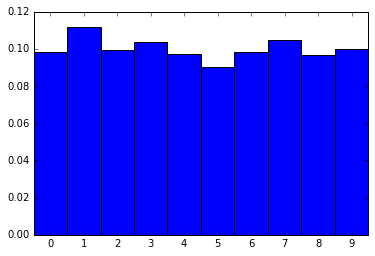

In [14]:
#Display a normalized histogram of the counts
cat = ['0','1','2','3','4','5','6','7','8','9'] #categories
pos = np.arange(len(cat))   #create indicies 
ax = plt.axes()
ax.set_xticks(pos + .5) #set x ticks half way through each bar
ax.set_xticklabels(cat) #set x labels to categories

plt.bar(pos, c, 1, color='b')
plt.show()

In [ ]:
#Find best match for one sample of each digit
#For 0 and 1 compute pairwise distances for all genuine matches and all impostor matches
#Plot histograms of the genuine and impostor distances
#Generate an ROC curve
#What is the equal error rate

In [15]:
#Implement a KNN classifier
def get_neighbors(array1, array2, array3): #array1 is test, array2 is train, array3 is the Y handle for train
    distances = []
    for s in range(0,len(array1)):
        x = []
        n = []
        for j in range(0,len(array2)):
            z = euclidean_distances(array1[s].reshape(1,-1), array2[j].reshape(1,-1))
        #calculated the L2 distance for that digit vs all others
            x.append((s,array3[j],z[0][0])) #append the index of the test, the label of the train, and the distance
            x.sort(key=operator.itemgetter(2)) #put in ascending order
        for y in range(5): #how many k's
                n.append(x[y][1]) #append only the label
                m = max(set(n), key=n.count) #take majority vote
        distances.append(m)
    return(distances) #return list of predicted labels for test data

In [16]:
#Try KNN on small dataset
X_train = X[0:500] 
X_test = X[500:1000] 
Y_train = Y[0:500]
Y_test = Y[500:1000]

startTime = time.time()#time the function to comapre with sklearn KNN
labels = get_neighbors(X_test, X_train, Y_train)
elapsedTime = time.time() - startTime
labels

[6,
 9,
 0,
 3,
 9,
 6,
 8,
 2,
 0,
 9,
 3,
 5,
 8,
 2,
 8,
 2,
 1,
 1,
 9,
 8,
 4,
 7,
 1,
 2,
 4,
 5,
 0,
 1,
 5,
 1,
 9,
 4,
 6,
 5,
 8,
 9,
 2,
 3,
 0,
 5,
 1,
 4,
 0,
 5,
 1,
 2,
 4,
 9,
 6,
 1,
 6,
 1,
 0,
 4,
 9,
 0,
 0,
 5,
 9,
 8,
 3,
 5,
 7,
 9,
 9,
 3,
 9,
 9,
 3,
 5,
 6,
 5,
 2,
 4,
 2,
 4,
 2,
 9,
 1,
 2,
 5,
 3,
 7,
 0,
 1,
 0,
 9,
 9,
 4,
 5,
 1,
 6,
 9,
 7,
 1,
 6,
 3,
 3,
 1,
 2,
 2,
 0,
 5,
 0,
 6,
 8,
 3,
 6,
 1,
 7,
 3,
 5,
 1,
 7,
 9,
 3,
 9,
 2,
 8,
 3,
 7,
 4,
 2,
 2,
 3,
 6,
 1,
 0,
 1,
 8,
 6,
 9,
 2,
 1,
 6,
 0,
 2,
 5,
 0,
 4,
 8,
 3,
 1,
 2,
 7,
 1,
 9,
 3,
 1,
 9,
 4,
 9,
 1,
 8,
 7,
 7,
 9,
 7,
 0,
 6,
 9,
 4,
 5,
 6,
 2,
 3,
 7,
 9,
 9,
 2,
 3,
 0,
 8,
 4,
 8,
 0,
 0,
 9,
 7,
 7,
 9,
 0,
 2,
 1,
 6,
 5,
 9,
 1,
 1,
 9,
 1,
 7,
 8,
 6,
 9,
 7,
 5,
 3,
 1,
 6,
 4,
 3,
 7,
 1,
 1,
 8,
 3,
 5,
 1,
 7,
 1,
 1,
 8,
 6,
 4,
 3,
 9,
 3,
 1,
 1,
 8,
 9,
 0,
 9,
 1,
 9,
 3,
 3,
 0,
 3,
 0,
 8,
 0,
 3,
 3,
 5,
 3,
 5,
 7,
 0,
 5,
 9,
 0,
 5,
 9,
 1,
 5,
 1,
 1,
 2,


In [17]:
elapsedTime

32.30045294761658

In [18]:
#Get accuracy
def accuracy(label,array4): #predicated labels,Y_test
    good = 0
    for i in range(0,len(label)):
        if label[i] == array4[i]:
            good =good+1  #if labels match then good gets a 1, if not good gets a 0
        else:
            good =good+0
    return(good/len(label)) 

In [20]:
accuracy(labels,Y_test) #get accuracy on small sample

0.812

In [21]:
#Optimize K - function that includes previous get_neighbors and accuracy 
def get_neighbors1(array1, array2, array3, array4, k): #array1 is test, array2 is train, array3 is the Y handle for train
    distances = []
    for s in range(0,len(array1)):
        x = []
        n = []
        for j in range(0,len(array2)):
            z = euclidean_distances(array1[s].reshape(1,-1), array2[j].reshape(1,-1))
            x.append((s,array3[j],z[0][0]))
            x.sort(key=operator.itemgetter(2))
        for y in range(k):
            n.append(x[y][1])
            m = max(set(n), key=n.count)
        
        distances.append(m)
    lis = distances
    good = 0
    for i in range(0,len(lis)):
        if lis[i] == array4[i]:
            good =good+1
        else:
            good =good+0
    return(k,good/len(lis))

In [23]:
#Optimize K
for k in range(1,11,1): #test accuracy with k 1-10
    print(get_neighbors1(X_test,X_train,Y_train,Y_test,k))

(1, 0.814)
(2, 0.778)
(3, 0.812)
(4, 0.792)
(5, 0.812)
(6, 0.79)
(7, 0.804)
(8, 0.79)
(9, 0.78)
(10, 0.78)


In [26]:
#Compare previous time with sklearn KNN
startTime = time.time()
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)
label = neigh.predict(X_test)
elapsedTime = time.time() - startTime
print(elapsedTime)
label

0.4147639274597168


array([6, 9, 0, 3, 9, 6, 8, 2, 0, 9, 3, 5, 8, 2, 8, 2, 1, 1, 9, 8, 4, 7, 1,
       2, 4, 5, 0, 1, 5, 1, 7, 4, 6, 5, 8, 9, 2, 3, 0, 5, 1, 4, 0, 5, 1, 2,
       4, 7, 6, 1, 6, 1, 0, 4, 9, 0, 0, 5, 9, 8, 3, 5, 7, 9, 9, 3, 9, 9, 3,
       5, 6, 5, 2, 4, 2, 4, 2, 9, 1, 2, 5, 3, 7, 0, 1, 0, 9, 5, 4, 5, 1, 6,
       9, 7, 1, 6, 3, 3, 1, 2, 2, 0, 5, 0, 6, 3, 3, 6, 1, 7, 3, 5, 1, 7, 9,
       3, 9, 2, 8, 3, 7, 4, 2, 2, 3, 6, 1, 0, 1, 8, 6, 9, 2, 1, 6, 0, 2, 5,
       0, 4, 8, 3, 1, 2, 7, 1, 9, 3, 1, 9, 4, 5, 1, 8, 7, 7, 9, 7, 0, 6, 9,
       4, 5, 6, 2, 3, 7, 9, 4, 2, 3, 0, 8, 4, 8, 0, 0, 9, 7, 7, 9, 0, 2, 1,
       6, 5, 7, 1, 1, 7, 1, 7, 8, 6, 9, 7, 5, 3, 1, 6, 4, 3, 7, 1, 1, 8, 3,
       5, 1, 7, 1, 1, 8, 6, 4, 3, 9, 3, 1, 1, 8, 9, 0, 9, 1, 9, 3, 3, 0, 3,
       0, 8, 0, 3, 3, 5, 3, 5, 7, 0, 5, 9, 0, 5, 9, 1, 5, 1, 1, 2, 6, 5, 5,
       9, 3, 1, 6, 0, 2, 2, 8, 7, 7, 1, 0, 1, 5, 6, 3, 2, 9, 4, 3, 6, 0, 1,
       6, 1, 5, 4, 3, 0, 5, 0, 6, 2, 7, 6, 6, 6, 1, 6, 7, 8, 2, 0, 6, 0, 8,
       0, 5,

In [4]:
#3-fold Cross Validation
#round1
knn1 = KNeighborsClassifier(n_neighbors=5) 
X1_train = X[14000:42000] #2/3 of data to train with
X1_test = X[0:14000]  #1/3 of data to test with
Y1_train = Y[14000:42000]
Y1_test = Y[0:14000] 
knn1.fit(X1_train, Y1_train)  
labels1 = knn1.predict(X1_test)

In [28]:
acc1 = accuracy(labels1,Y1_test)
acc1

0.9645714285714285

In [70]:
#round2
knn2 = KNeighborsClassifier(n_neighbors=5)
X_train2, X_test2 = X[np.concatenate((np.arange(0,14000),np.arange(28000,42000)),axis=0)], X[np.arange(14000,28000)]
Y_train2, Y_test2 = Y[np.concatenate((np.arange(0,14000),np.arange(28000,42000)),axis=0)], Y[np.arange(14000,28000)]
knn2.fit(X_train2, Y_train2)
labels2 = knn2.predict(X_test2)
acc2 = accuracy(labels2,Y_test2)
acc2

0.9631428571428572

In [71]:
#round3
knn3 = KNeighborsClassifier(n_neighbors=5)
X_train3, X_test3 = X[np.arange(0,28000)], X[np.arange(28000,42000)]
Y_train3, Y_test3 = Y[np.arange(0,28000)], Y[np.arange(28000,42000)]
knn3.fit(X_train3, Y_train3)
labels3 = knn3.predict(X_test3)
acc3 = accuracy(labels3,Y_test3)
acc3

0.9649285714285715

In [72]:
acc = (acc1+acc2+acc3)/3  #get average accuracy
acc

0.9642142857142857

In [73]:
#Create Confusion Matrix 
cm1 = confusion_matrix(Y1_test, labels1)
cm2 = confusion_matrix(Y_test2, labels2)
cm3 = confusion_matrix(Y_test3, labels3)
cm = (cm1+cm2+cm3)/3
cm = cm.astype(int) #easier to visualize as an integer
cm

array([[1368,    0,    1,    0,    0,    2,    4,    0,    0,    0],
       [   0, 1553,    3,    0,    0,    0,    0,    2,    0,    0],
       [  11,   19, 1322,    4,    1,    1,    1,   27,    2,    1],
       [   1,    4,    9, 1397,    0,   14,    0,    8,    8,    6],
       [   0,   16,    0,    0, 1301,    0,    4,    2,    0,   30],
       [   3,    3,    0,   24,    1, 1206,   16,    1,    1,    7],
       [   8,    2,    0,    0,    1,    5, 1360,    0,    0,    0],
       [   0,   20,    3,    1,    4,    0,    0, 1421,    0,   15],
       [   6,   16,    6,   25,    7,   26,    6,    4, 1240,   14],
       [   5,    4,    1,   11,   15,    3,    0,   23,    3, 1328]])

In [90]:
#Train KNN on all of training data and test on all of testing data 
X_test = np.genfromtxt('/Users/leighajarett/Desktop/test.csv', dtype=None, delimiter=',', skip_header=1) 
X_train = X

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y)
labels = knn.predict(X_test)

In [108]:
id = np.arange(1,28001,1)
predictions = np.concatenate((id, labels))
predictions.reshape(28000,2)

array([[1, 2],
       [3, 4],
       [5, 6],
       ..., 
       [7, 9],
       [7, 3],
       [9, 2]])